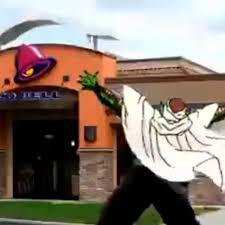

In [5]:
from IPython.display import Image
Image("TACOBELL.jpg")

# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [41]:
df1 = pd.read_csv('customer_data.csv')
df2 = pd.read_csv('ad_data.csv')

In [43]:
df = pd.merge(df1, df2)

In [85]:
df[df["age"] == 70]

,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased
487,8424,FL,F,70.0,Retired,1,0,BOGO - Baja Blast,Newspaper ad,False,"['crunchy taco', 'chalupa supreme']","['gatorade', 'baja blast']"
796,7815,FL,M,70.0,Retired,5,0,DISCOUNT-20%,Newspaper ad,False,"['cheesy bean and rice burrito', 'soft taco', ...","['iced tea', 'mountain dew', 'baja blast', 'mo..."
1442,2101,FL,M,70.0,Retired,5,0,BOGO - Garlic Steak Nacho Fries,30 sec cable TV ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'diet pepsi', 'brisk', 'baja blas..."
1473,658,FL,F,70.0,Retired,2,0,REWARD - Free Baja Blast with purchase of $20 ...,30 sec cable TV ad,False,"['soft taco', 'mexican pizza', 'mexican pizza']","['mug root beer', 'mountain dew', 'starry']"
1537,4408,FL,F,70.0,Retired,4,0,DISCOUNT-50%,30 sec cable TV ad,True,"['cheesy bean and rice burrito', 'cinnamon twi...","['gatorade', 'diet pepsi', 'starry', 'mug root..."
2032,8414,FL,M,70.0,Retired,4,0,DISCOUNT-50%,Newspaper ad,True,"['cheesy gordita crunch', 'mexican pizza', 'so...","['starry', 'pepsi', 'pepsi', 'baja blast', 'pe..."
2294,7365,FL,M,70.0,Retired,3,0,BOGO - Baja Blast,Newspaper ad,False,"['cheesy bean and rice burrito', 'cravings box...","['gatorade', 'starry', 'gatorade', 'baja blast']"
3137,564,FL,M,70.0,Retired,3,0,DISCOUNT-20%,30 sec cable TV ad,False,"['steak garlic nacho fries', 'mexican pizza', ...","['diet pepsi', 'diet pepsi', 'baja blast', 'ba..."
4196,1126,KY,M,70.0,Retired,5,0,DISCOUNT-5%,Newspaper ad,False,"['soft taco', 'mexican pizza', 'mexican pizza'...","['mountain dew', 'iced tea', 'pepsi', 'diet pe..."
4521,5692,FL,M,70.0,Retired,3,0,DISCOUNT-5%,Newspaper ad,False,"['chalupa supreme', 'beefy 5 layer burrito', '...","['diet pepsi', 'brisk', 'mountain dew', 'brisk']"


In [95]:
count = 0
for age in df['age']:
    if age >= 55:
        count += 1
print(f"There are {count} seniors")

There are 1017 seniors


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

<Axes: xlabel='age', ylabel='income'>

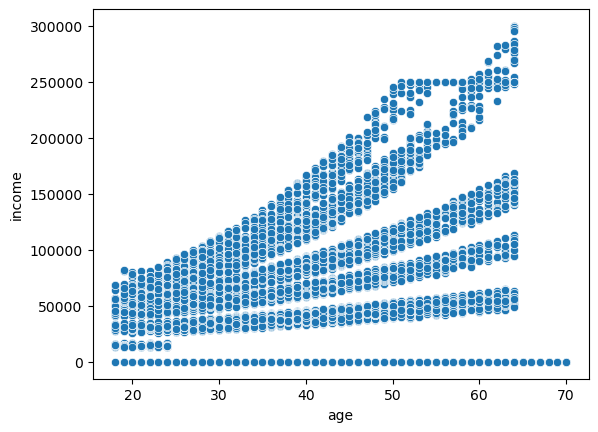

In [99]:
sns.scatterplot(data = df, x = 'age', y = 'income')

In [111]:
tdf, _ = train_test_split(df, test_size=0.3, random_state=42)
tdf = tdf[["age", "income", "family_size"]]
tdf.head()

,age,income,family_size
9069,46.0,43755,0
2603,44.0,0,3
7738,26.0,63823,1
1579,35.0,126008,1
5058,28.0,64661,2


In [131]:
model = KMeans(n_clusters=4)
model.fit(train_df)

KMeans(n_clusters=4)

In [133]:
model.cluster_centers_

array([[4.46005535e+01, 1.22354591e+05, 2.09132841e+00],
       [3.65280722e+01, 7.12871268e+04, 1.87553985e+00],
       [5.33507463e+01, 2.15856045e+05, 2.28731343e+00],
       [3.66681716e+01, 3.12418575e+04, 1.82650758e+00]])

#### Don't forget to describe the centers of the clusters you found.

### Cluster 1: younger adults with smaller family sizes are lower class

### Cluster 2: middle aged people with more people in their family are upper middle class

### Cluster 3: Seniors

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [15]:
# Test model here.

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.